In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 1760.0     # sine frequency, Hz

In [3]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [4]:
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

e-04 = 1/10000, e-03 = 1/1000, e-02 = 1/100, e-01 = 1/10

In [5]:
# generate phase
theta = t * 2*np.pi * freq

In [6]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)

Text(0, 0.5, 'real')

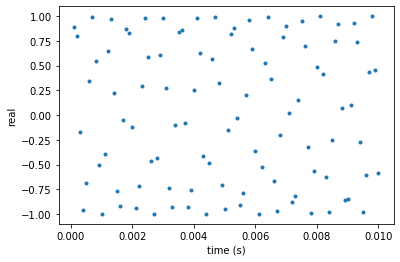

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.') 
#[0:1000] : 0부터 1000번째 까지 범위를 지정해 준 것이다. 즉, 점이 1000개 나온다.
#t 와 s의 개수는 따라서 동일하여야 한다. 
#보통 x축에 time, y축에 s를 놓는다. 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

Text(0, 0.5, 'real')

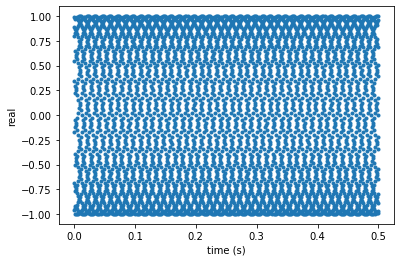

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s, '.') 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

Text(0, 0.5, 'real')

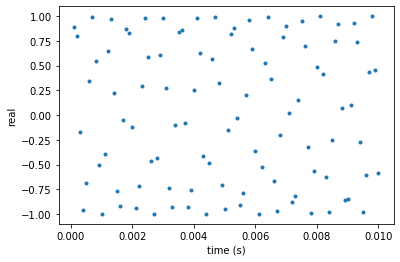

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.') 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [10]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)
c # c값들이 모두 a + bi 형식이다. 

array([ 0.44838322+8.93841424e-01j, -0.59790498+8.01566985e-01j,
       -0.98456433-1.75023059e-01j, ..., -0.59790498-8.01566985e-01j,
        0.44838322-8.93841424e-01j,  1.        +1.25522677e-13j])

e-01 같은 형식은 긴 수든 짧은 수든 정보량을 같게 만들어주는 기능을 한다. 

Text(0.5, 0, 'imag')

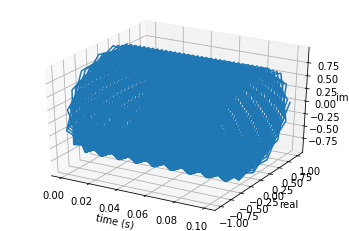

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '-') #복소수 c에서 c.real은 실수값만, c.imag는 허수값만 가져온다는 뜻이다. 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

Text(0.5, 0, 'imag')

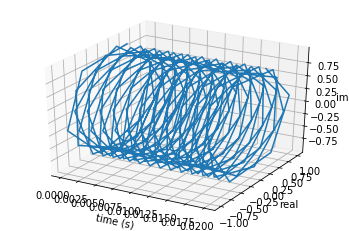

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:200], c.real[0:200], c.imag[0:200], '-') #복소수 c에서 c.real은 실수값만, c.imag는 허수값만 가져온다는 뜻이다. 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

Text(0.5, 0, 'imag')

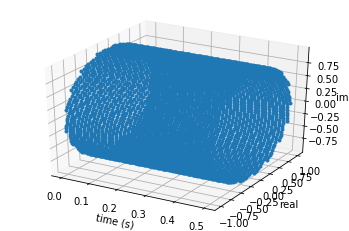

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, c.real, c.imag, '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [14]:
ipd.Audio(s, rate=sr)

In [15]:
ipd.Audio(c.real, rate=sr)

s = c.real

# Generate pulse train

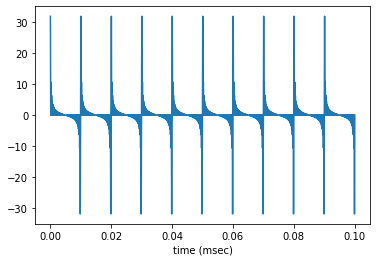

In [16]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
    #s = s + amp * np.sin(theta)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]);
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

In [17]:
# 위의 그림은 스펙트럼이 아니다. 

In [18]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW, srate)) #위에 만든 함수가 들어있음
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [19]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG) #sr = sampling rate, RG: freqency, BWG: bandwidth-> 산맥의 폭: 뚱뚱한 산맥이 폭이 더 넓다.
s = lfilter(b, a, s, axis=0)     
ipd.Audio(s, rate=sr)

In [20]:
RG = 500 #first formant
BWG = 60
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [21]:
RG = 1500
BWG = 200
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [22]:
RG = 2500
BWG = 200
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [23]:
RG = 3500
BWG = 200
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [24]:
s = lfilter(np.array([1, -1]), np.array([1]),s)  # 입술이 있는 상태를 재현 - 소리가 더 힘있어짐. 
ipd.Audio(s, rate=sr)

# load wav

In [25]:
from scipy.io import wavfile
#sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

In [33]:
nSamp

5000

# Fourier tranform

In [26]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

Text(0, 0.5, 'amplitude')

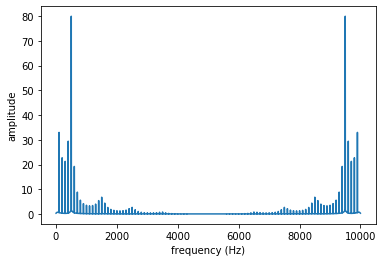

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

500hz의 성분은 강함. 2000hz의 성분은 상대적으로 약함.

500, 1500, 2500에서 산이 보임. resonance를 이용하여 gradually decrease하지 않았으면 flat 했을 거임.

위의 그래프는 시간이 반영된 그래프가 아님. -> 이는 스펙트로그램으로 보일 수 있음. 

# define helper functions

In [28]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)
    
    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
    # if cutoff is not None: 
    # cutoff_bin = round(cutoff * nfft / (srate)) # hz -> bin
    # frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  #sec -> sample
        
    if win_type == 'rect':
        return np.kaiser(win_samp,0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)
    
def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor = 'white', figsize=(14,6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform bu increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [29]:
max_freq = None       #cutoff freq
win_size = 0.008      # sec
win_step = 0.001      # sec
win_type = 'hanning'  # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2f8cb172668>)

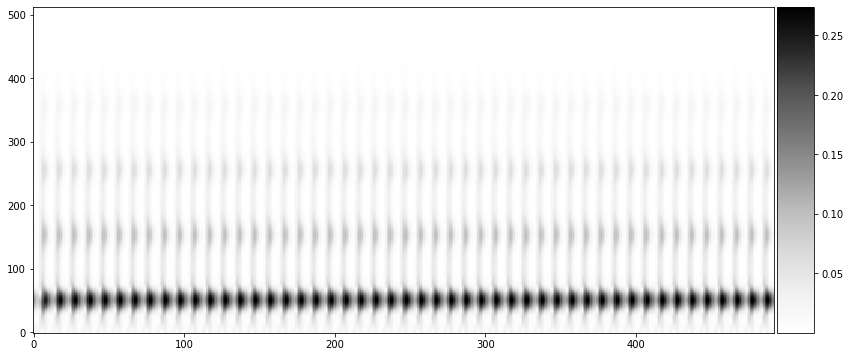

In [30]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) #frames x (nfft//2 +1)
plot_spectrogram(magspec)

스펙트로그램의 한 슬라이스가 위의 바 그래프 하나라고 보면 됨. 

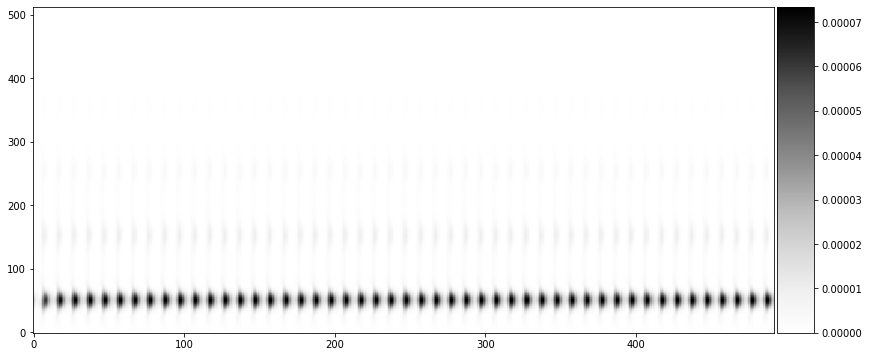

In [31]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

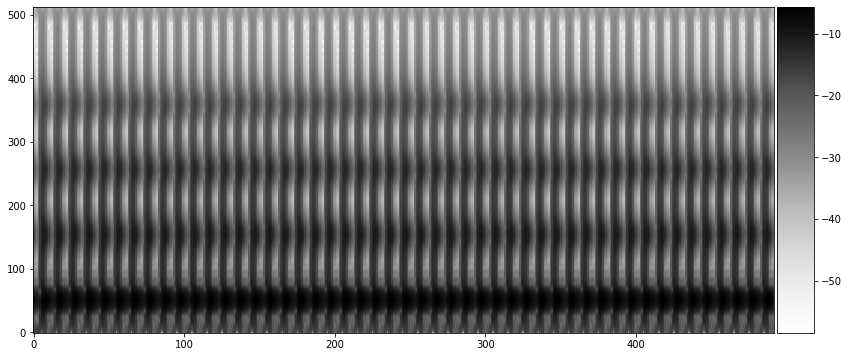

In [32]:
logspec = 10 * np.log10(magspec)  #dB scale
plot_spectrogram(logspec);